In [35]:
from tensorflow.keras.datasets import mnist
import numpy as np
# Load dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


In [36]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))


In [37]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255


In [38]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [39]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [9]:
(a,b),(c,d)=mnist.load_data()

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [41]:
model = Sequential()

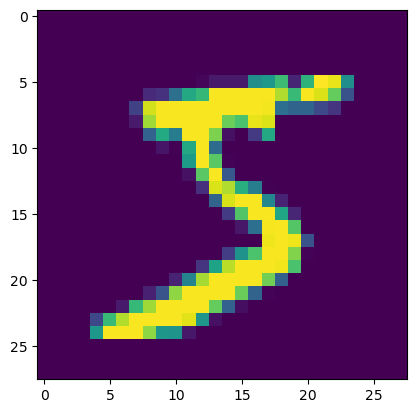

In [42]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0])


In [43]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [44]:
b

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [45]:
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

C:\Users\hetbh\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [47]:
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [48]:
model.add(Flatten())

In [49]:
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

In [50]:
model.add(Dense(10, activation='softmax'))

In [51]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [52]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 110,474 (431.54 KB)

 Trainable params: 110,474 (431.54 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
history=model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.7621 - loss: 0.7256 - val_accuracy: 0.9718 - val_loss: 0.0899
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.9665 - loss: 0.1150 - val_accuracy: 0.9808 - val_loss: 0.0644
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.9756 - loss: 0.0823 - val_accuracy: 0.9841 - val_loss: 0.0522
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.9823 - loss: 0.0604 - val_accuracy: 0.9847 - val_loss: 0.0523
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.9857 - loss: 0.0508 - val_accuracy: 0.9864 - val_loss: 0.0449
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.9877 - loss: 0.0408 - val_accuracy: 0.9869 - val_loss: 0.0468
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.9902 - loss: 0.0325 - val_accuracy: 0.9869 - val_loss: 0.0457
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.9911 - loss: 0.0293 - 

In [54]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_accuracy}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9854 - loss: 0.0539
Test accuracy: 0.9884999990463257


In [55]:
model.save('mnist_cnn_model.h5')


In [56]:
from tensorflow.keras.models import load_model

loaded_model = load_model('mnist_cnn_model.h5')

In [57]:
predictions = loaded_model.predict(test_images[:5])
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
[[6.6206116e-12 3.2080656e-08 1.4753964e-07 7.6590778e-09 1.5869334e-11
  8.1106337e-11 1.5009939e-16 9.9999988e-01 3.6781651e-11 1.1381105e-08]
 [3.3704998e-07 1.6043673e-09 9.9999964e-01 1.4185774e-08 7.2088752e-11
  7.8578992e-15 6.8163059e-10 1.2756419e-08 1.0476860e-09 5.7436438e-12]
 [1.6239259e-08 9.9999893e-01 3.5217948e-08 1.0932878e-09 2.8744495e-08
  2.7601726e-07 5.0577452e-08 4.3455429e-07 2.1573611e-07 1.9628008e-08]
 [9.9999988e-01 1.4350037e-12 9.4558237e-09 4.4471729e-13 2.2139188e-10
  6.9673080e-11 3.3135642e-08 1.0337912e-09 7.9570073e-11 8.6081364e-08]
 [2.2553258e-11 1.1803242e-08 8.7548896e-10 6.9369022e-13 9.9999881e-01
  8.8852306e-14 4.2653476e-12 7.5449167e-09 1.4199434e-08 1.2234982e-06]]


In [59]:
import numpy as np

img_index = 0  # index of the image you want to predict
img = np.expand_dims(test_images[img_index], axis=0)  # Add batch dimension
prediction = model.predict(img)
predicted_label = np.argmax(prediction)
print(f'Predicted label: {predicted_label}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
Predicted label: 7


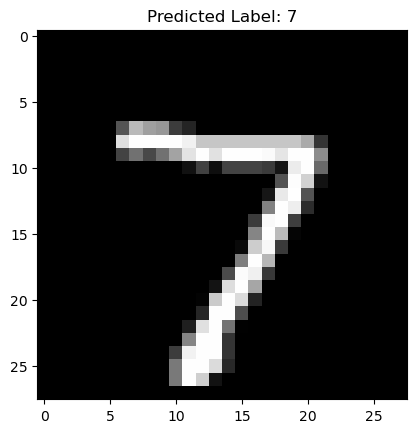

In [61]:
import matplotlib.pyplot as plt

plt.imshow(test_images[img_index].reshape(28, 28), cmap='gray')
plt.title(f'Predicted Label: {predicted_label}')
plt.show()
